In [26]:
import numpy as N
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime,timedelta
import pytz as pytz
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
import modules.thermolib as thermo
import modules.DSDlib as dsd
import modules.disdrometer_module as dis
import pandas as pd
import glob
import numpy.random as random
%matplotlib inline

In [3]:
# Some global parameters
rhoa = 1.0 # kg m^-3
cr = 1000.*N.pi/6.

In [24]:
# Function definitions
def gammaDSD(D, cx,q ,Nt=None, N0=None, alpha=0):
    """Given cx, q, Nt or N0, and alpha, compute the gamma DSD for the sequence of diameters in D"""
    if(N0 is None):
        try:
            N0,_ = dsd.cal_N0(rhoa, q/1000., Nt, cx, alpha)
        except Exception:
            return None
    else:
        try:
            Nt = dsd.cal_Nt(rhoa, q/1000., N0, cx, alpha)
        except Exception:
            return None
        
    lamda = dsd.cal_lamda(rhoa, q/1000., Nt, cx, alpha)
    
    return N0*D**alpha*N.exp(-lamda*D)

def samplegammaDSD(N0,)

def plotDSD(Dl, Dmid, Dr, ND, ax=None):
    """Plots a DSD on a semilog plot"""
    if ax is None:
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot(111)
    ax.bar(Dl, ND, Dr-Dl, 10.**2., align='edge', log=True, color='tan', edgecolor = 'k')
    ax.set_yscale('log')
    ax.set_ylim(10.**2., 10.**8.5)
    ax.set_xlim(0., 9.)
    ax.set_xlabel('D (mm)')
    ax.set_ylabel(r'N(D) $(m^{-4})$')
    
    return ax

In [23]:
D = dis.avg_diameter/1000.
Dl = dis.min_diameter/1000.
Dr = dis.max_diameter/1000.
qr = 1.0 # kg kg^-1
N0r = 8.0e6 # M-P value (m^-4)

ND = gammaDSD(D,cr,qr,N0=N0r)

print ND

[  6.95528742e+06   5.25733038e+06   3.97388650e+06   3.00376289e+06
   2.27047036e+06   1.71619260e+06   1.29722770e+06   9.80542454e+05
   7.41167880e+05   5.60230539e+05   3.68164629e+05   2.10349963e+05
   1.20182938e+05   6.86662284e+04   3.92322821e+04   1.69431493e+04
   5.53088834e+03   1.80549232e+03   5.89381365e+02   1.92396494e+02
   3.58837884e+01   3.82384074e+00   4.07475315e-01   4.34212992e-02
   4.62705138e-03   1.60955783e-04   1.82771975e-06   2.07545166e-08
   2.35676153e-10   2.67620056e-12   9.92024574e-15   1.20040268e-17]


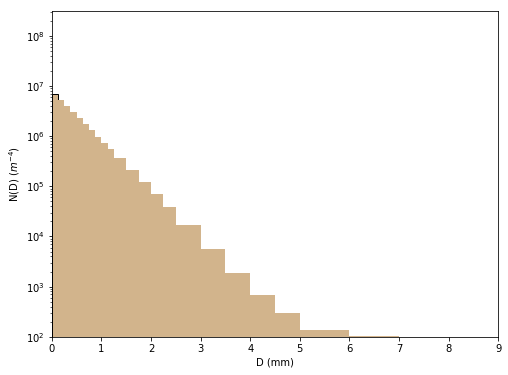

In [25]:
ax = plotDSD(Dl*1000., D*1000., Dr*1000., ND)

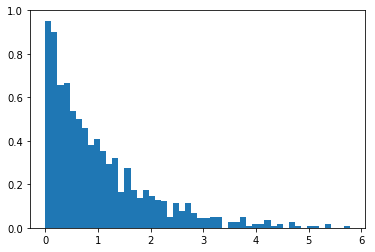

In [34]:
shape = 1.
s = random.gamma(shape,size=1000)
count, bins, ignored = plt.hist(s, 50, normed=True)

array([ 2.63317045,  3.80474045,  0.62032497,  3.48151995,  2.27329763,
        0.54646567,  0.9716212 ,  0.8637483 ,  2.89471551,  3.34115317,
        1.69696628,  0.3355955 ,  0.94588001,  3.24479931,  1.37928025,
        0.97097326,  0.4990293 ,  3.1300058 ,  1.20175643,  1.37221539,
        2.30147812,  3.73696841,  5.58148385,  1.11879246,  2.08276426,
        1.64121061,  0.39976236,  1.92463647,  1.84031383,  1.07629719,
        1.9365678 ,  0.86905835,  0.60665513,  2.45935818,  1.89395322,
        0.86919545,  3.29058518,  0.9891241 ,  1.50996307,  4.86022437,
        2.67350797,  1.71965839,  2.65382719,  2.70046644,  1.98161879,
        2.38253378,  2.07686089,  3.31733265,  0.61526332,  0.51430122,
        2.91889544,  1.07832802,  2.50685361,  3.03153513,  0.90003725,
        5.24859976,  2.24983169,  1.37315601,  0.97878235,  1.47110617,
        0.75977835,  3.29530193,  1.47206152,  1.12981054,  1.7673167 ,
        1.92900179,  2.7248439 ,  0.89372241,  1.0687794 ,  1.58